# **FASE IV: MODELADO (NO-SUPERVISADO)**

In [1]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

monopoly = pd.read_parquet('../monopoly_cleaned_parquet')

In [22]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

import cudf, cuml, cupy

monopoly = cudf.read_parquet('../monopoly_cleaned_parquet')


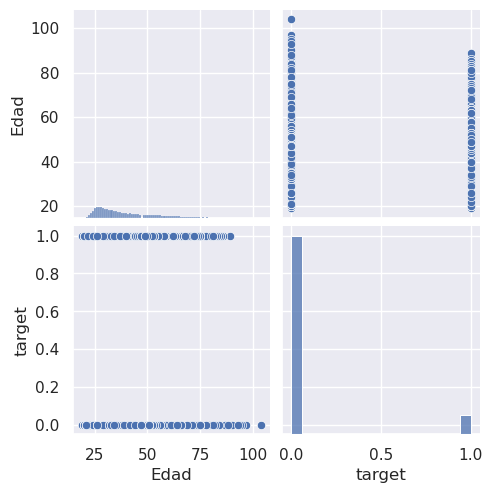

In [4]:
# Pair-plot
sns.set()
sns.pairplot(data=monopoly ,vars=["Edad", "target"])
plt.show()

## **HDBSCAN**

In [7]:
monopoly.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null  f

In [2]:
#'Edad' y 'target'
X =monopoly.iloc[:, [3,20]].values

### **Modelo N°1**

In [3]:
from sklearn.cluster import AgglomerativeClustering

cj_1 = AgglomerativeClustering(affinity='euclidean', linkage='single', distance_threshold=50, n_clusters=None)

In [4]:
Y_hat = cj_1.fit_predict(X)

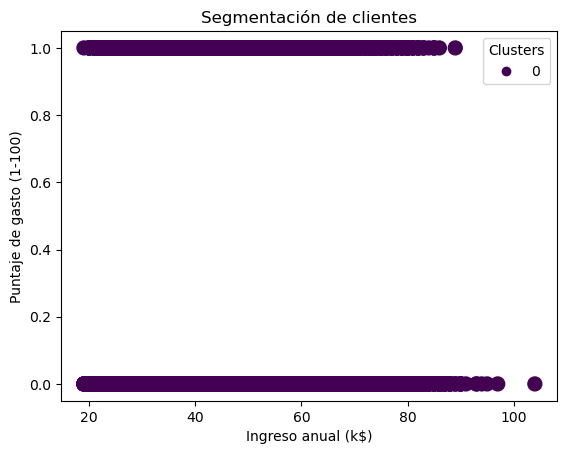

In [5]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

SS_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_1)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)